In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import qqplot_2samples,qqplot
from pandas.core.indexing import is_sequence
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score , jaccard_score , log_loss

In [2]:
path_train = '/content/drive/MyDrive/datasets_sample/Stroke_prediction/train.csv'

In [3]:
train = pd.read_csv(path_train, index_col= 'id')

In [4]:
train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
train.shape

(15304, 11)

In [6]:
train.size

168344

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


In [8]:
train.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
train.duplicated().sum()

0


#Stroke (Target)


<Axes: xlabel='stroke', ylabel='count'>

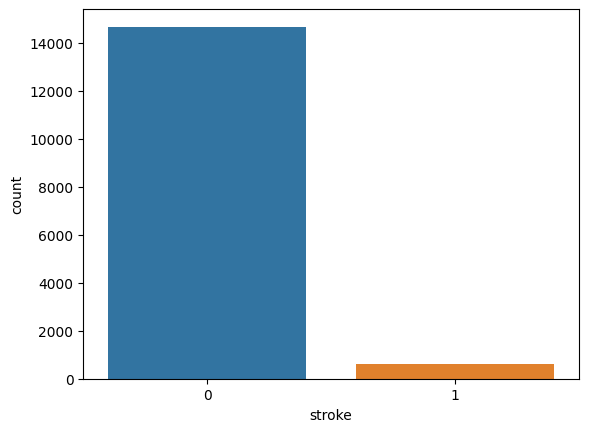

In [10]:
sns.countplot(x= train['stroke'])

In [11]:
np.unique(train['stroke'] , return_counts=True)

(array([0, 1]), array([14672,   632]))

Target is **Unbalanced**



#Categorical Variables(Object)





#gender

<Axes: xlabel='gender', ylabel='count'>

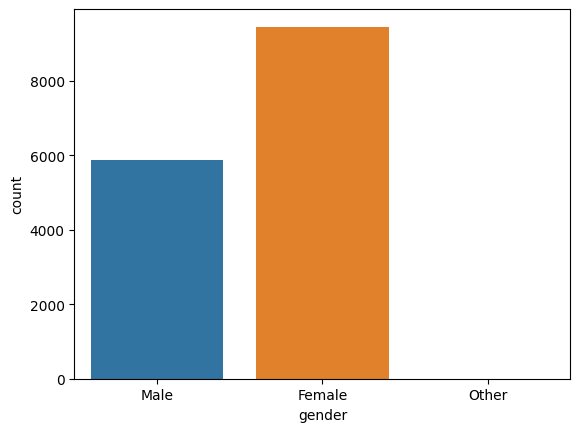

In [12]:
sns.countplot( x=train['gender'])

In [13]:
np.unique(train['gender'] , return_counts=True)

(array(['Female', 'Male', 'Other'], dtype=object), array([9446, 5857,    1]))

In [14]:
train[train.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9363,Other,9.0,0,0,No,children,Rural,96.04,18.0,Unknown,0


In [15]:
gen_index = train[train.gender == 'Other'].index

In [16]:
train.drop(gen_index , axis=0 , inplace=True )

<Axes: xlabel='gender', ylabel='count'>

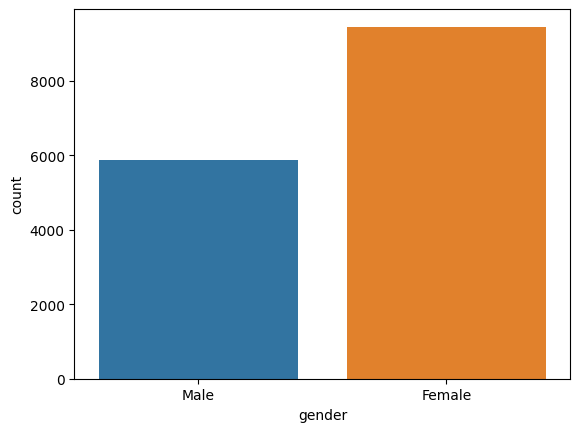

In [17]:
sns.countplot( x=train['gender'])

#ever_married

<Axes: xlabel='ever_married', ylabel='count'>

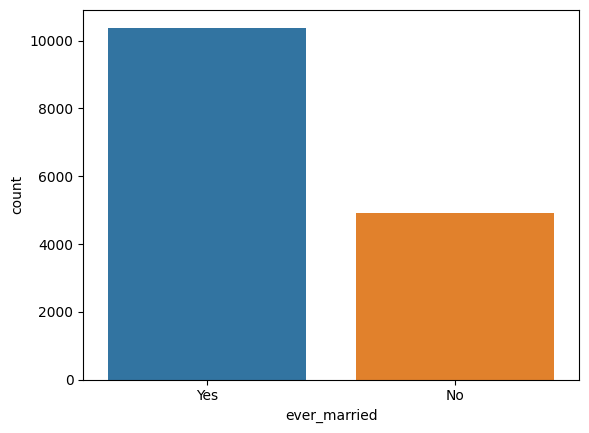

In [18]:
sns.countplot( x=train['ever_married'])

#work_type

<Axes: xlabel='work_type', ylabel='count'>

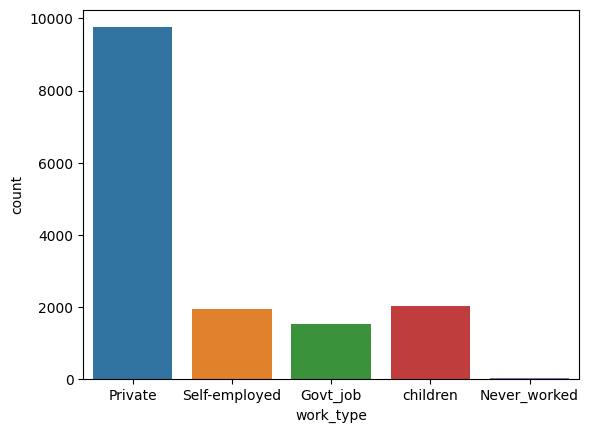

In [19]:
sns.countplot( x=train['work_type'])

#Residence_type

<Axes: xlabel='Residence_type', ylabel='count'>

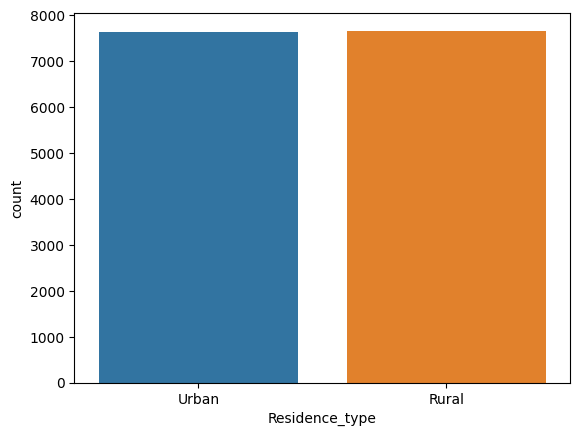

In [20]:
sns.countplot(x = train['Residence_type'])

#smoking_status

<Axes: xlabel='smoking_status', ylabel='count'>

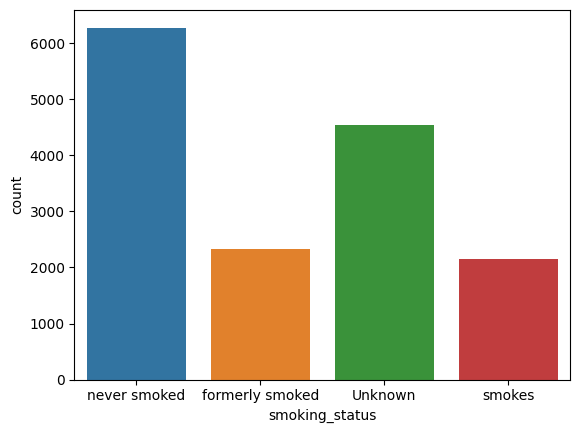

In [21]:
sns.countplot(x = train['smoking_status'])

In [22]:
train[train.smoking_status == 'Unknown'].shape  # about 29.68% of smoking_status is Unknown

(4542, 11)

In [23]:
# Unknow is not true so it was replaced with Nan
train.replace({'smoking_status' :'Unknown'},np.nan, inplace=True)

In [24]:
# Now we have null and have to fill it
train.smoking_status.isna().sum()

4542

In [25]:
train.smoking_status.unique()

array(['never smoked', 'formerly smoked', nan, 'smokes'], dtype=object)

##Dealing with missing value

In [26]:
imputer = SimpleImputer( missing_values=np.nan ,strategy= 'most_frequent')
train['smoking_status']= imputer.fit_transform(train[['smoking_status']])

<Axes: xlabel='smoking_status', ylabel='count'>

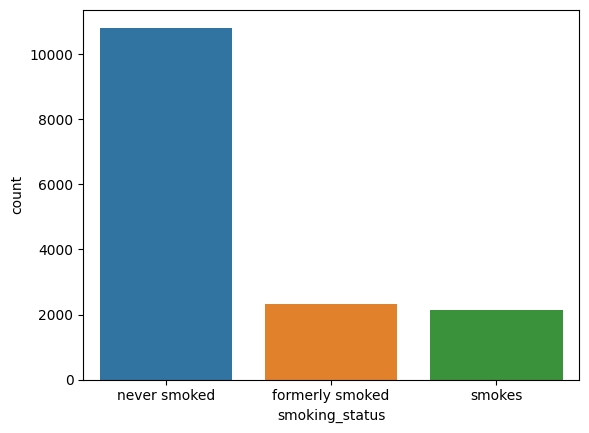

In [27]:
sns.countplot(data= train , x='smoking_status')

#Numerical Variables

#age

<Axes: xlabel='age', ylabel='Count'>

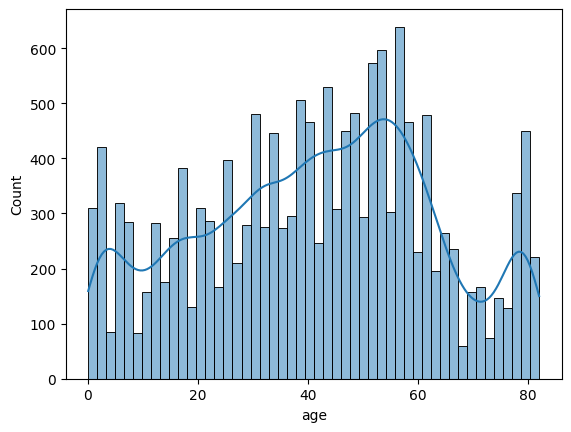

In [28]:
sns.histplot(train['age'] , bins= 50,kde=True)

In [29]:
print('min:' , train['age'].min())
print('max:' , train['age'].max())
print('skew:' , train['age'].skew())
print('kurt:' , train['age'].kurt())
print('std:' , train['age'].std())
print('mean:' , train['age'].mean())
print('median:' , train['age'].median())
print('mode:' , train['age'].mode())


min: 0.08
max: 82.0
skew: -0.10366931009831606
kurt: -0.8066689900706647
std: 21.44377262859694
mean: 41.419826177873624
median: 43.0
mode: 0    57.0
Name: age, dtype: float64


In [30]:
train[((train['work_type']=='children') | (train['age']<18)) & (train['stroke']==1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
3226,Male,10.0,0,0,No,children,Urban,93.28,18.4,never smoked,1


In [31]:
train[(train['age']<10) & (train['stroke']==1)].count()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [32]:
train.drop(train[train['age'] <10].index, inplace=True)

In [33]:
train[(train['work_type']=='children') & (train['age']>18)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
4935,Female,55.0,0,0,No,children,Rural,81.59,17.7,formerly smoked,0
10481,Female,54.0,0,0,No,children,Rural,65.78,32.2,formerly smoked,0
14103,Male,63.0,0,1,Yes,children,Rural,78.73,16.4,never smoked,0


In [34]:
C_A_index= train[(train['work_type']=='children') & (train['age']>18)].index
train.drop(C_A_index , axis=0 , inplace=True)

In [35]:
train[(train['work_type']!='children') & (train['age']<12)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
1171,Male,11.0,0,0,No,Private,Rural,94.69,28.4,never smoked,0
6292,Male,10.0,0,0,No,Private,Urban,111.08,27.9,formerly smoked,0
8891,Male,10.0,0,0,No,Private,Urban,56.34,19.1,never smoked,0
11935,Male,10.0,0,0,No,Private,Urban,77.67,33.5,formerly smoked,0


In [36]:
work_age_index = train[(train['work_type']!='children') & (train['age']<12)].index
train.drop(work_age_index , axis=0 , inplace=True)

In [37]:
train.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

#avg_glucose_level

The expected values for normal fasting blood glucose concentration are between **70** mg/dL (3.9 mmol/L) and **100** mg/dL (5.6 mmol/L).

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

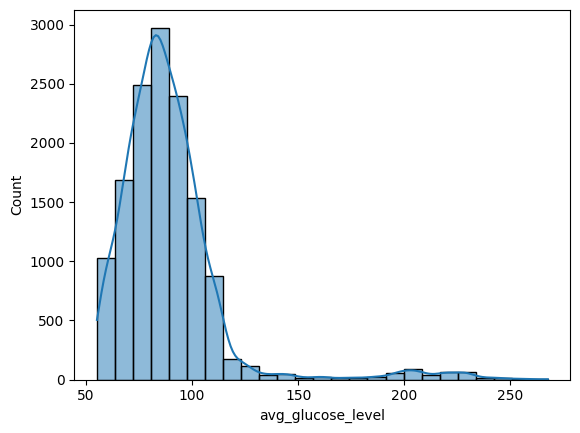

In [38]:
sns.histplot(train['avg_glucose_level'] , bins= 25,kde=True)

In [39]:
print('min:' , train['avg_glucose_level'].min())
print('max:' , train['avg_glucose_level'].max())
print('skew:' , train['avg_glucose_level'].skew())
print('kurt:' , train['avg_glucose_level'].kurt())
print('mean:' , train['avg_glucose_level'].mean())
print('std:' , train['avg_glucose_level'].std())
print('median:' , train['avg_glucose_level'].median())
print('mode:' , train['avg_glucose_level'].mode())


min: 55.22
max: 267.6
skew: 3.0493640787720957
kurt: 12.754040150125416
mean: 89.27839507067777
std: 26.242589598766212
median: 85.07
mode: 0    85.84
Name: avg_glucose_level, dtype: float64


<Axes: >

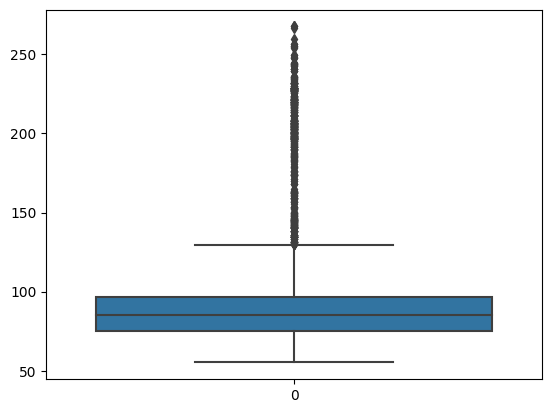

In [40]:
sns.boxplot(train['avg_glucose_level'])

In [41]:
q1 = np.percentile(train['avg_glucose_level'],25 , axis=0)
q3 = np.percentile(train['avg_glucose_level'],75 , axis =0)

median = np.median(train['avg_glucose_level'])

IQR = q3-q1

upper_bound = q3 +(1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print('upper:' , upper_bound , 'Lower:' , lower_bound)


upper: 129.8425 Lower: 41.86249999999998


In [42]:
train[((upper_bound < (train['avg_glucose_level'])) | ( lower_bound > train['avg_glucose_level'])) & (train['stroke']==0)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
22,Male,71.0,0,1,Yes,Self-employed,Urban,196.61,33.5,formerly smoked,0
33,Male,58.0,0,0,Yes,Private,Rural,223.36,33.2,smokes,0
69,Female,68.0,0,0,Yes,Self-employed,Urban,196.58,34.8,never smoked,0
72,Male,38.0,0,0,Yes,Self-employed,Rural,135.74,35.6,formerly smoked,0
81,Male,54.0,0,1,Yes,Private,Urban,140.28,31.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
15131,Male,66.0,0,1,Yes,Self-employed,Rural,204.05,30.5,formerly smoked,0
15138,Female,76.0,0,1,Yes,Self-employed,Urban,207.96,34.5,formerly smoked,0
15195,Male,64.0,0,0,Yes,Govt_job,Urban,205.77,43.7,never smoked,0


In [43]:
glo_index = train[((upper_bound < (train['avg_glucose_level'])) | ( lower_bound > train['avg_glucose_level'])) & (train['stroke']==0)].index

In [44]:
train.drop(glo_index , axis=0 , inplace=True)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

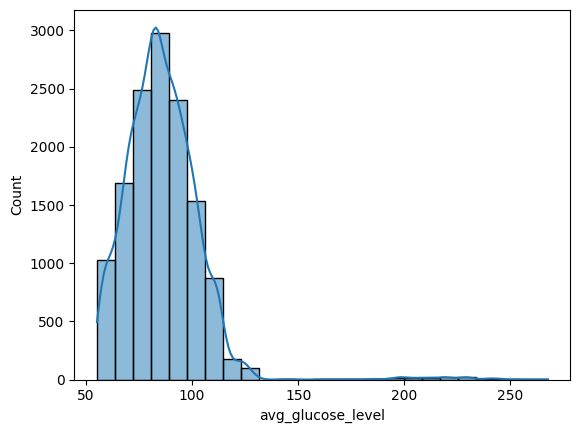

In [45]:
sns.histplot(train['avg_glucose_level'] , bins= 25,kde=True)

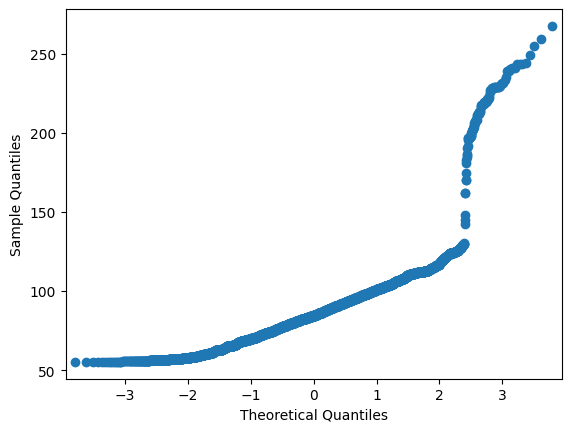

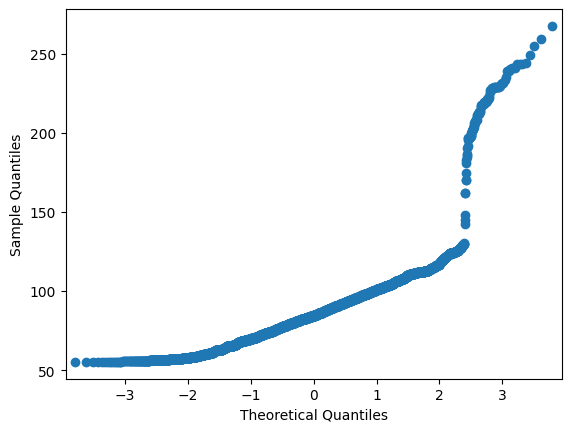

In [46]:
qqplot(train['avg_glucose_level'] )

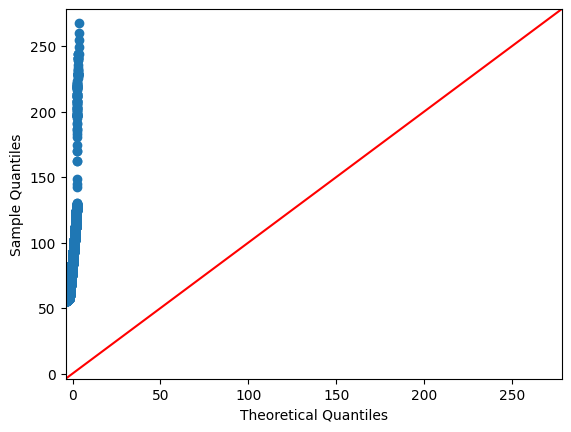

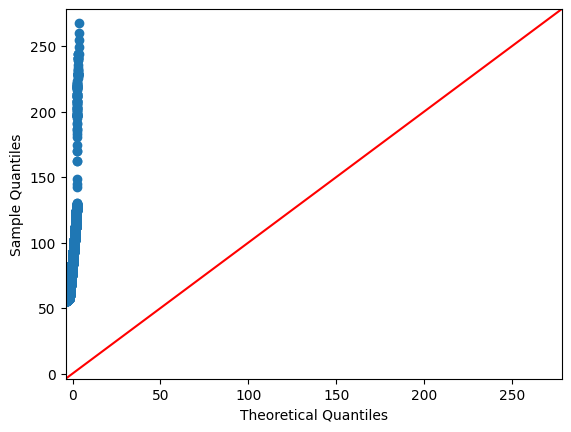

In [47]:
qqplot(train['avg_glucose_level'], line= '45' )

#bmi

<Axes: xlabel='bmi', ylabel='Count'>

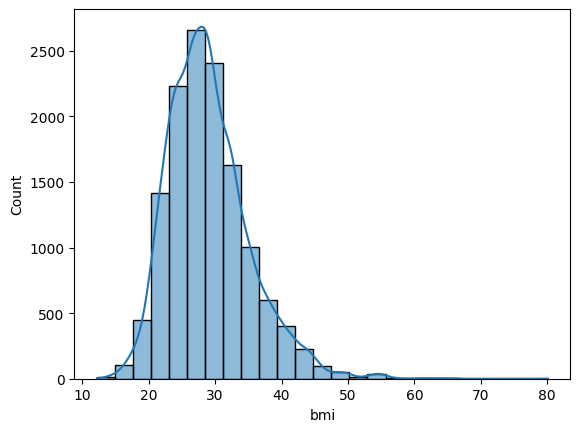

In [48]:
sns.histplot(train['bmi'] , bins= 25,kde=True)

In [49]:
print('min:' , train['bmi'].min())
print('max:' , train['bmi'].max())
print('skew:' , train['bmi'].skew())
print('kurt:' , train['bmi'].kurt())
print('std:' , train['bmi'].std())
print('mean:' , train['bmi'].mean())
print('median:' , train['bmi'].median())
print('mode:' , train['bmi'].mode())


min: 12.2
max: 80.1
skew: 0.9339076568233315
kurt: 1.933594538941973
std: 6.125902612833932
mean: 29.007027148306037
median: 28.3
mode: 0    23.4
Name: bmi, dtype: float64


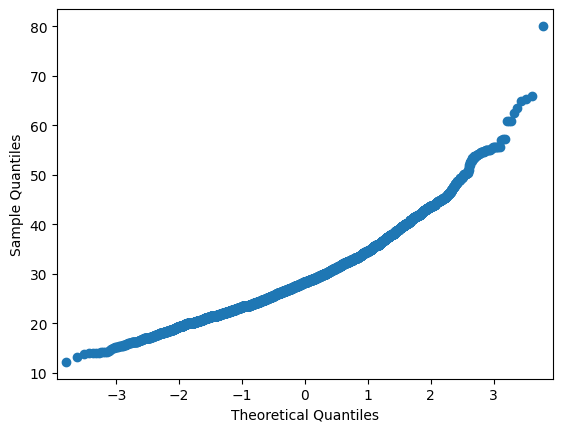

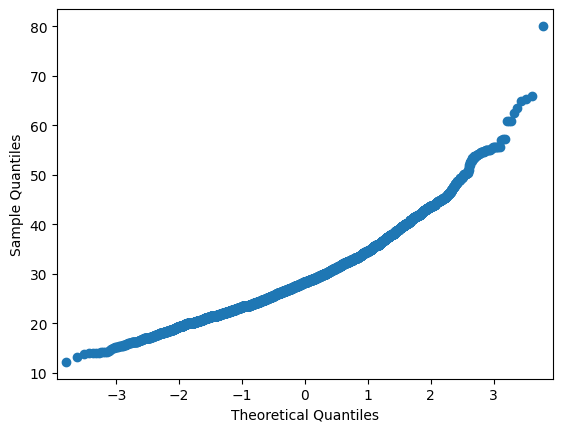

In [50]:
qqplot(train['bmi'] )

<Axes: xlabel='bmi'>

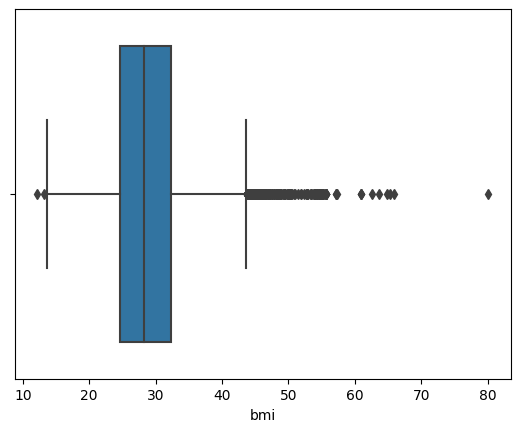

In [51]:
sns.boxplot(data= train , x='bmi')

In [52]:
q1_bmi = np.percentile(train['bmi'],25 , axis=0)
q3_bmi = np.percentile(train['bmi'],75 , axis =0)

median_bmi = np.median(train['bmi'])

IQR_bmi = q3_bmi-q1_bmi

upper_bound_bmi = q3_bmi +(1.5 * IQR_bmi)
lower_bound_bmi = q1_bmi - (1.5 * IQR_bmi)

print('upper:' , upper_bound_bmi , 'Lower:' , lower_bound_bmi)

upper: 43.699999999999996 Lower: 13.300000000000002


In [53]:
train[((train['bmi']>43.7) | (train['bmi']<13.3)) & (train['stroke']==0)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
127,Female,61.0,0,0,Yes,Govt_job,Rural,74.36,48.2,never smoked,0
440,Female,61.0,0,0,Yes,Private,Rural,87.81,43.8,formerly smoked,0
459,Female,33.0,0,0,Yes,Private,Urban,112.46,43.8,never smoked,0
471,Female,37.0,0,0,No,Private,Rural,76.44,45.2,never smoked,0
561,Male,60.0,0,0,Yes,Private,Urban,99.96,48.8,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15115,Female,27.0,0,0,No,Private,Urban,112.41,53.9,smokes,0
15144,Male,38.0,0,0,Yes,Private,Urban,93.55,43.9,smokes,0
15171,Female,42.0,0,0,Yes,Private,Rural,86.73,47.1,smokes,0


In [54]:
bmi_index = train[((train['bmi']>43.7) | (train['bmi']<13.3)) & (train['stroke']==0)].index

In [55]:
train.drop(bmi_index , axis= 0 , inplace=True)

#Categorical(Not Object)

#hypertension

<Axes: xlabel='hypertension', ylabel='count'>

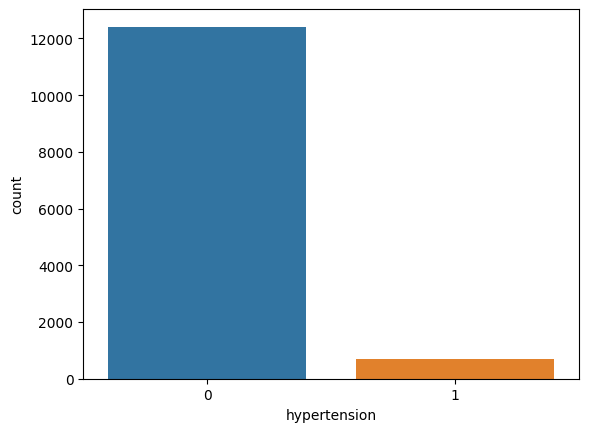

In [56]:
sns.countplot(x = train['hypertension'])

#heart_disease

<Axes: xlabel='heart_disease', ylabel='count'>

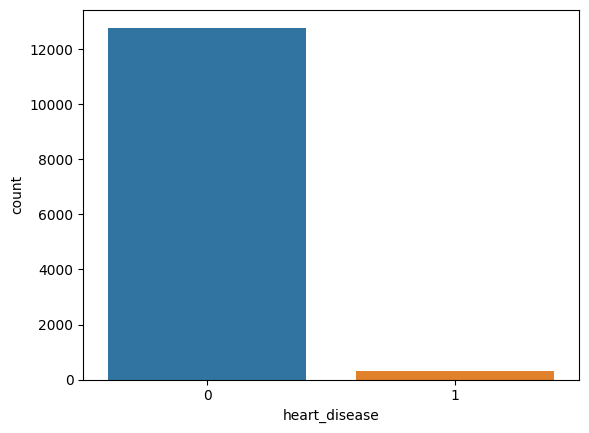

In [57]:
sns.countplot(x = train['heart_disease'])

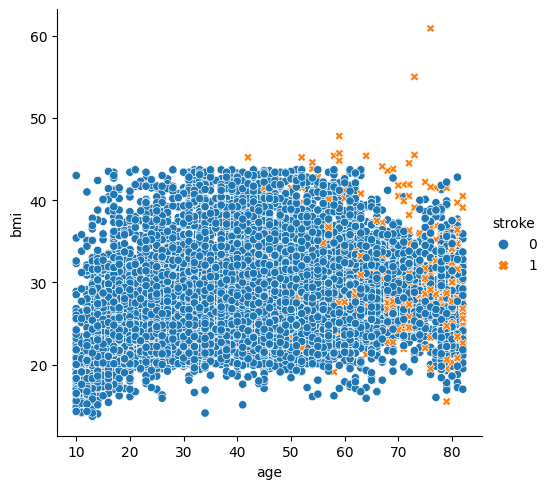

In [58]:
sns.relplot(
    data=train,
    x="age", y="bmi", hue="stroke", style="stroke"
)

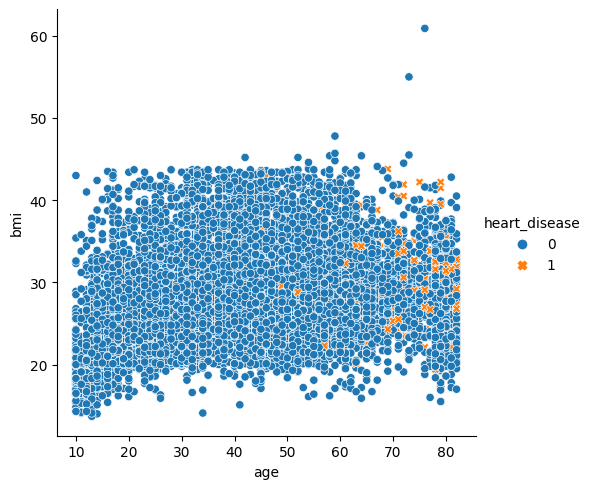

In [59]:
sns.relplot(
    data=train,
    x="age", y="bmi", hue="heart_disease", style="heart_disease"
)

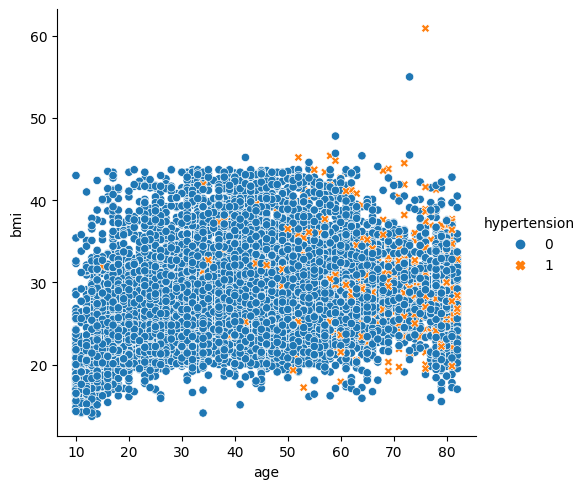

In [60]:
sns.relplot(
    data=train,
    x="age", y="bmi", hue="hypertension", style="hypertension"
)

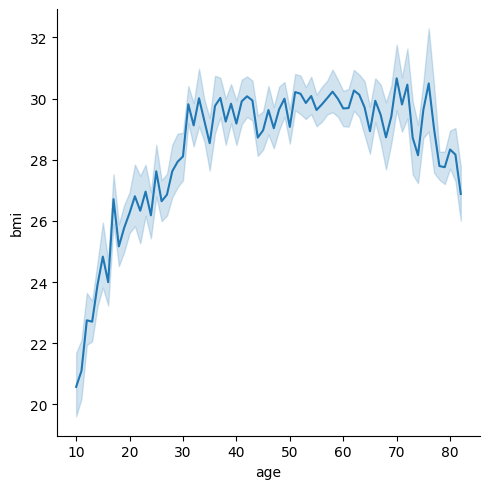

In [61]:
sns.relplot(data=train, x="age", y="bmi", kind="line")

#Convert cat to num

In [62]:
for col in train.columns:
  if train[col].dtype == 'object':
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])

In [63]:
train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,1,28.0,0,0,1,2,1,79.53,31.1,1,0
1,1,33.0,0,0,1,2,0,78.44,23.9,0,0
2,0,42.0,0,0,1,2,0,103.00,40.3,1,0
3,1,56.0,0,0,1,2,1,64.87,28.8,1,0
4,0,24.0,0,0,0,2,0,73.36,28.8,1,0


# Correlations

In [64]:
train.corr()['stroke']

gender               0.023178
age                  0.281807
hypertension         0.153206
heart_disease        0.122066
ever_married         0.097542
work_type            0.009294
Residence_type      -0.000919
avg_glucose_level    0.254355
bmi                  0.067186
smoking_status      -0.027024
stroke               1.000000
Name: stroke, dtype: float64

In [65]:
x = train.drop(columns='stroke')
y = train['stroke']

In [66]:
x = train[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'gender','bmi','ever_married' ]]

In [67]:
y = train['stroke']

#scaling

In [68]:
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

#**Modeling**

##Finding the best hyperparameter for model

In [69]:
def Dts (x,y,Testsize,mdepth):
    df_evaluation=pd.DataFrame()
    for c in Testsize:
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=c,random_state=0)
        for maxdepth in mdepth:
            clf=DecisionTreeClassifier(max_depth=maxdepth , criterion='entropy')
            clf.fit(x_train,y_train)
            y_pred=clf.predict(x_test)
            dict={'Test_size':c,"max_defth":maxdepth,'acc': metrics.accuracy_score(y_test,y_pred),"score":clf.score(x,y)}
            df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return(df_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return['background-color:yellow' if v else '' for v in is_max]

In [70]:
df_evaluation=Dts(x,y,[.1,.15,.20,.25,.30],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,1,16,17,18,19,20])
df_evaluation.style.apply(highlight_max)

<ipython-input-69-0822b2b4b17e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_evaluation=df_evaluation.append(dict,ignore_index=True)
<ipython-input-69-0822b2b4b17e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_evaluation=df_evaluation.append(dict,ignore_index=True)
<ipython-input-69-0822b2b4b17e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_evaluation=df_evaluation.append(dict,ignore_index=True)
<ipython-input-69-0822b2b4b17e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_evaluation=df_evaluation.append(dict,ignore_index=True)
<ipython-input-69-0822b2b4b17e>:10: FutureWarning: The frame.append method is de

,Test_size,max_defth,acc,score
0,0.100000,1.000000,0.948855,0.951726
1,0.100000,2.000000,0.950382,0.958066
2,0.100000,3.000000,0.954198,0.960281
3,0.100000,4.000000,0.954962,0.961427
4,0.100000,5.000000,0.954962,0.961427
5,0.100000,6.000000,0.953435,0.961580
6,0.100000,7.000000,0.951908,0.961885
7,0.100000,8.000000,0.950382,0.963260
8,0.100000,9.000000,0.951908,0.964940
9,0.100000,10.000000,0.950382,0.965857


##Splitting Data

In [71]:
X_train , X_test , y_train , y_test =train_test_split(X, y , test_size= 0.2 , random_state=42)

##Creating model

In [72]:
clf=DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=42)
clf.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [73]:
y_pred = clf.predict(X_test)

#Evaluation

In [74]:
print('accuracy_score:', round(accuracy_score(y_test , y_pred)*100 , 2) ,'%')

accuracy_score: 96.56 %


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2508
           1       1.00      0.19      0.32       111

    accuracy                           0.97      2619
   macro avg       0.98      0.59      0.65      2619
weighted avg       0.97      0.97      0.95      2619



In [76]:
print('jaccard_score:', (jaccard_score(y_test , y_pred , average= 'micro')))
print('log_loss:', (log_loss(y_test , y_pred )))



jaccard_score: 0.9335548172757475
log_loss: 1.2386135185263627
